In [1]:
# import libraries
import time
import os
import re
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  
import numpy as np  
import random  
import string

import bs4 as bs  
import urllib.request  
import re 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import heapq

In [2]:
# check working directory
os.getcwd()

'C:\\Users\\aksha\\Programming_And_Course\\UCD\\Machine_Learning\\Final Project'

### Fetching data from Mongodb

In [3]:
# mongo db params
client = MongoClient("mongodb://localhost:27017/")
database = client["ddr"]
collection = database["goodreads_books_info"]

In [4]:
# get data from mongodb
def fetch_data(collection_name, df):
    for item in collection_name.find():
        try:
            bookTitle = item['info']['BookTitle']
            authorName = item['info']['AuthorName']
            rating = item['info']['Rating']
            countRatings = item['info']['NumberOfRatings']
            countReviews = item['info']['NumberOfReviews']
            editionLang = item['info']['EditionLanguage']
            top5Genres = item['info']['Top5Genres']
            description = item['info']['BookDescription']
            
            df = df.append([[bookTitle,authorName,rating,countRatings,countReviews,editionLang,top5Genres,description]],
                           ignore_index = True)
        
        except:
            pass
        
    return(df)

In [5]:
# data frame
df_book_info = pd.DataFrame()
df_book = fetch_data(collection, df_book_info)

# renmaing columns
df_book.columns = ['bookTitle', 'authorName', 'rating', 'countRatings',
                    'countReviews','editionLang','genres','Description']

# dropping duplicates
df_book = df_book.drop_duplicates(subset='bookTitle',ignore_index=True)
df_book

,bookTitle,authorName,rating,countRatings,countReviews,editionLang,genres,Description
0,The New Drawing on the Right Side of the Brain,Betty Edwards,3.87,323968,868,English,"[Art, Nonfiction, Art, Drawing, Reference]",When Drawing on the Right Side of the Brain wa...
1,Steal Like an Artist: 10 Things Nobody Told Yo...,Austin Kleon,3.95,241210,7067,English,"[Nonfiction, Art, Self Help, Language, Writing]","You don’t need to be a genius, you just need t..."
2,Wall and Piece,Banksy,3.85,215178,900,English,"[Art, Nonfiction, Politics, Art, Street Art]","Banksy, Britain's now-legendary ""guerilla"" str..."
3,The Artist's Way: A Spiritual Path to Higher C...,Julia Cameron,3.92,102222,3341,English,"[Nonfiction, Language, Writing, Art, Self Help]",The Artist’s Way is the seminal book on the su...
4,Art and Fear: Observations on the Perils (and ...,Ted Orland,3.76,79816,1182,English,"[Art, Nonfiction, Language, Writing, Self Help]","""This is a book about making art. Ordinary art..."
...,...,...,...,...,...,...,...,...
855,The Road to Little Dribbling: Adventures of an...,Bill Bryson,3.70,33434,4487,English,"[Travel, Nonfiction, Humor, Autobiography, Mem...",The hilarious and loving sequel to a hilarious...
856,A Time of Gifts,Jan Morris,4.06,7240,847,English,"[Travel, Nonfiction, Autobiography, Memoir, Hi...","In 1933, at the age of 18, Patrick Leigh Fermo..."
857,The Old Ways: A Journey on Foot,Robert Macfarlane,4.15,7842,1111,English,"[Nonfiction, Travel, Environment, Nature, Hist...",Robert Macfarlane travels Britain's ancient pa...
858,Around the World in Eighty Days,Michael Glencross,3.94,211560,8583,English,"[Classics, Fiction, Adventure, Science Fiction...","One night in the reform club, Phileas Fogg bet..."


### EDA and data cleaning

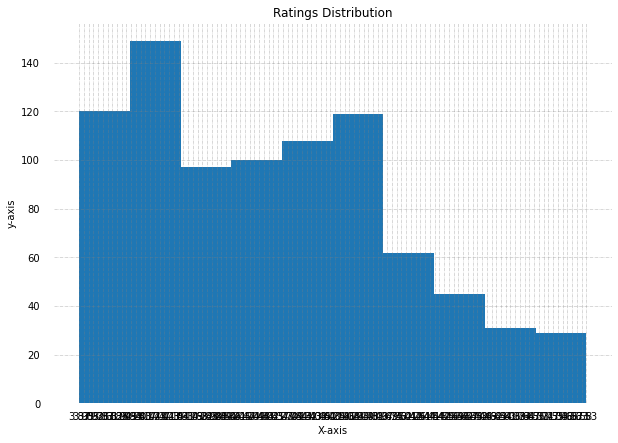

In [6]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = False)
 
axs.hist(df_book['rating'], bins = 10)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Ratings Distribution')
# Show plot
plt.show()

In [7]:
# unique genre list
genreList = []
for index, row in df_book.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)


In [8]:
# one hot encoding function
def binary(genre_list,main_list):
    binaryList = []
    
    for genre in main_list:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList


In [9]:
# generating labels for genres
df_book['genres_bin'] = df_book['genres'].apply(lambda x: binary(x, genreList))
df_book['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
3    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

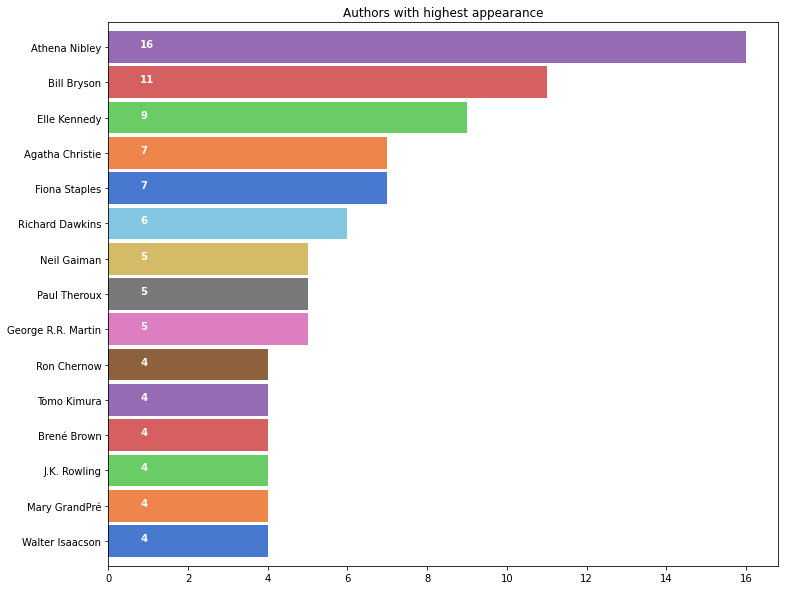

In [10]:
# plotting top authors
plt.subplots(figsize=(12,10))
list1=[]
for i in range(len(df_book['authorName'])):
    list1.append(df_book['authorName'][i])

ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))

for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')

plt.title('Authors with highest appearance')
plt.show()

In [11]:
# labeling for authors
authorList = []
for index, row in df_book.iterrows():
    author = df_book["authorName"]
    
    for i in author:
        if i not in authorList:
            authorList.append(i)
            
df_book['author_bin'] = df_book['authorName'].apply(lambda x: binary(x,authorList ))
df_book['author_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: author_bin, dtype: object

### Transformation of book description using bag of words method

In [12]:
###################### Transforming Descriptions ################

# Calling DataFrame constructor on list
df = pd.DataFrame(df_book,columns =['Description'])

#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Description_Token'] = df['Description'].apply(lambda x:remove_punctuation(x))
df['Description_Token']= df['Description_Token'].apply(lambda x: x.lower())

# using list comprehension + split()
# Tokenizing strings in list of strings
df['Description_Token'] = [sub.split() for sub in df['Description_Token']]

#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df['Description_Token']= df['Description_Token'].apply(lambda x:remove_stopwords(x))

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text


df['Description_Token']=df['Description_Token'].apply(lambda x: stemming(x))

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

import nltk
#nltk.download()
nltk.download('wordnet')
nltk.download('omw-1.4')

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['Description_Token']=df['Description_Token'].apply(lambda x:lemmatizer(x))

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

df['Description_Token'] = [' '.join(x) for x in df['Description_Token']] 

count = CountVectorizer(lowercase=False)
count_matrix = count.fit_transform(df['Description_Token'])
df_bow_sklearn = pd.DataFrame(count_matrix.toarray(),columns=count.get_feature_names())
df_bow_sklearn['bow_token'] = df_bow_sklearn.values.tolist()

df_book['bow_token'] = df_bow_sklearn['bow_token']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\users\aksha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Similarity Function

In [13]:
# similarity function
from scipy import spatial

def Similarity(a,book2):
    a = a.iloc[0,:]
    b = df_book.iloc[book2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['author_bin']
    scoreB = b['author_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    ratingA = float(a['rating'])
    ratingB = float(b['rating'])
    ratingDistance = spatial.distance.cosine(ratingA, ratingB)
    
    descA = a['bow_token']
    descB = b['bow_token']
    descDistance = spatial.distance.cosine(descA, descB) 
    
    return genreDistance + ratingDistance + scoreDistance + descDistance

### Generate recommendations 

In [14]:
import operator

def predict_score():
    name = input('Enter a book title: ')
    
    new_book = df_book[df_book['bookTitle'].str.contains(name)]
    print('Selected Movie: ',new_book.bookTitle.values[0])
    
    def getNeighbors(baseBook, K):
        distances = []
        
        for index, book in df_book.iterrows():
            if df_book.iloc[index,0] != baseBook['bookTitle'].values[0]:
                dist = Similarity(baseBook, index)
                distances.append((df_book.iloc[index,0], dist))
    
        distances.sort(key=operator.itemgetter(1))
        
        # initialize neighbors
        neighbors = []
        
        # get first 10 neighbors
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors
    
    # initilaize k
    K = 10
    neighbors = getNeighbors(new_book, K)
    
    print('\nRecommended Movies: \n')
    
    for neighbor in neighbors:
        print(neighbor[0])
    
    print('\n')

### Test output

In [16]:
predict_score()

Enter a book title: Lord of the Rings
Selected Movie:  The Lord of the Rings

Recommended Movies: 

The Fellowship of the Ring
The Two Towers
The Return of the King
The Man Who Mistook His Wife for a Hat and Other Clinical Tales
The Righteous Mind: Why Good People Are Divided by Politics and Religion
The Willpower Instinct: How Self-Control Works, Why It Matters, and What You Can Do to Get More of It
The Hobbit, or There and Back Again
A Dance with Dragons
A Storm of Swords
Life of Pi


